In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings; 
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('../dataset/processed/imputed_processed_data.csv')
df['date'] = pd.to_datetime(df['date'])
df

,date,price,anuradhapura_producer_price,kurunegala_producer_price,polonnaruwa_producer_price,production,production_total,exchange_rate,fuel_price,m0,m2,m1,m2b
0,1996-01-01,18.07,7.75,7.900,8.18,1333.600,2065.100,53.685,12.4,77071,228090,73783,260481
1,1996-02-01,18.70,8.17,8.260,8.76,1333.600,2065.100,53.685,12.4,79586,234199,77440,269496
2,1996-03-01,18.49,7.95,7.850,7.99,1333.600,2065.100,53.685,12.4,82915,239178,81796,272552
3,1996-04-01,18.52,8.25,8.010,8.29,1333.600,2065.100,54.735,12.4,80873,241893,79478,278425
4,1996-05-01,19.02,8.38,8.500,8.34,731.500,2065.100,54.950,12.4,83410,242072,76620,277365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,2022-08-01,239.24,112.60,113.863,122.93,1461.675,3392.875,357.880,430.0,1386248,10285938,1534114,11986911
320,2022-09-01,228.44,110.50,108.008,117.00,1461.675,3392.875,365.500,430.0,1378579,10351444,1528595,12051480
321,2022-10-01,224.78,105.48,106.740,109.50,1931.200,3392.875,363.000,430.0,1341681,10338384,1456688,12045719
322,2022-11-01,222.28,98.40,101.900,103.48,1931.200,3392.875,368.500,430.0,1318493,10416961,1457977,12162934


In [3]:
df['avg_producer_price'] = df[['polonnaruwa_producer_price', 'kurunegala_producer_price', 'anuradhapura_producer_price']].mean(axis=1)

## EDA

In [4]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

# Create Line plot
fig = px.line(df, x='date', y='price')
fig.add_scatter(x=df['date'], y=df['anuradhapura_producer_price'], name='Anuradhapura PPrice')
fig.add_scatter(x=df['date'], y=df['polonnaruwa_producer_price'], name='Polonnaruwa PPrice')
fig.add_scatter(x=df['date'], y=df['kurunegala_producer_price'], name='Kurunegala PPrice')
fig.add_scatter(x=df['date'], y=df['avg_producer_price'], name='Average PPrice')

# Add legend
fig.update_layout(showlegend=True)

# Display the plot
fig.show()

In [5]:
# Create Line plot
fig = px.line(df, x='date', y='production')
fig.add_scatter(x=df['date'], y=df['production_total'], name='Production (Yearly)')

# Add legend
fig.update_layout(showlegend=True)

# Display the plot
fig.show()

In [6]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

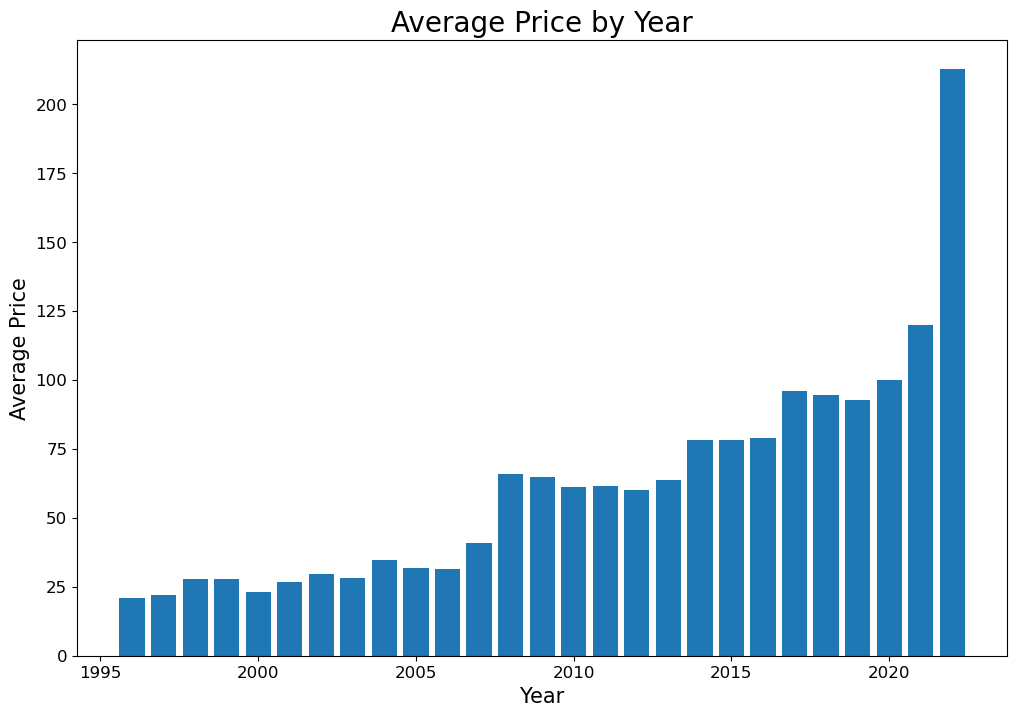

In [7]:
# Group the data by Year and calculate the mean price for each year
df_grouped = df.groupby('year')['price'].mean()

# Plot the mean prices as a bar plot using seaborn
plt.figure(figsize=(12,8))
plt.bar(df_grouped.index, df_grouped.values)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average Price', fontsize=15)
plt.title('Average Price by Year', fontsize=20)

# Set the font for the x-tick labels and the y-tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

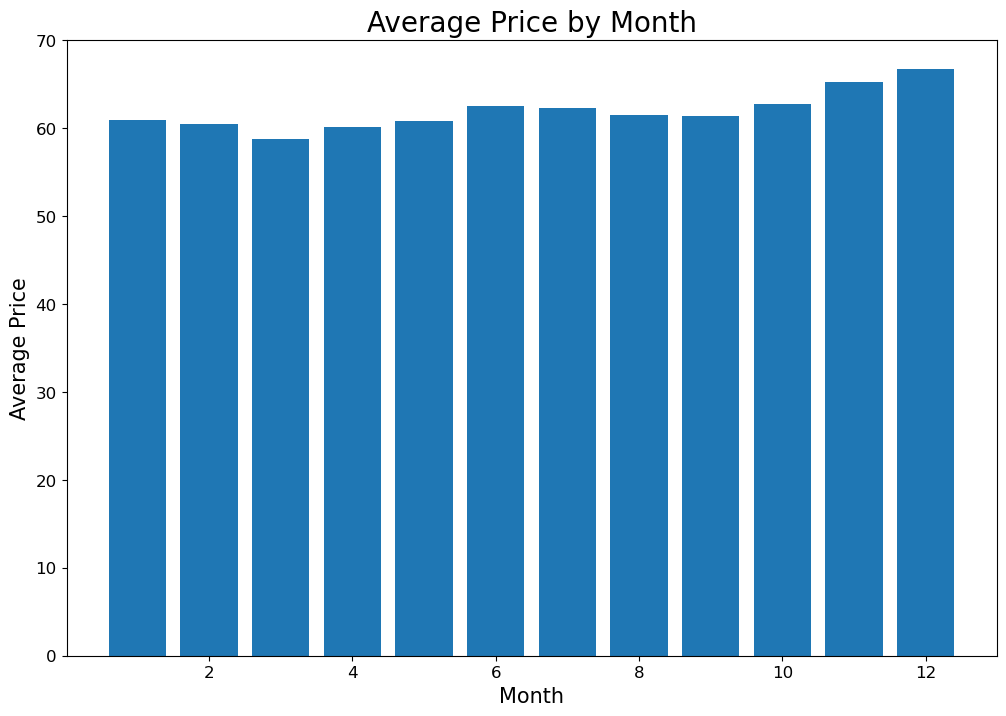

In [8]:
# Group the data by Year and calculate the mean price for each year
df_grouped = df.groupby('month')['price'].mean()

plt.figure(figsize=(12,8))
plt.bar(df_grouped.index, df_grouped.values)

# Set the x-axis label, y-axis label, and title
plt.xlabel('Month', fontsize=15)
plt.ylabel('Average Price', fontsize=15)
plt.title('Average Price by Month', fontsize=20)

# Set the font for the x-tick labels and the y-tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

The rice market has a delicate system of price determination that is associated with availability in the market. It is connected to seasonal harvests of Maha and Yala leading to high fluctuation of prices over certain months of the year. From January, the prices of paddy and rice decline gradually and reach their lowest in March with the major Maha harvest. It increases slightly from April and undergoes a minor slump during July-August when the minor Yala harvest reaches the market. The rise of the prices of all types of rice is quite sharp from September onwards reaching the peak in December and begin to decline again in January continuing the cycle. The difficulties faced by consumers due to a sharp rise in rice prices during September-January is one of the most politically sensitive issues in the country.

https://www.ips.lk/talkingeconomics/2021/10/07/rising-price-of-rice-in-sri-lanka-the-roots-and-remedies/

In [9]:
fig = px.line(df, x=df['date'], y='exchange_rate', title='Exchange Rate (USD to LKR)')
fig.show()

In [10]:
fig = px.line(df, x=df['date'], y='fuel_price', title='Fuel Prices (CEYPETCO)')
fig.show()

## Correlation Analysis

**Series can be generissled in order to simplify the correlation process.**

Starting off with farmgate prices, instead of checking correlation with other series for each district we can simply just look at the average farmagate price series as the trends are almost the same.

Same goes for things like the production series as we can look at the production for Maha and Yala to be more specific to our use case, instead of taking the yearly production figures.

As for monetary aggregates, lets go ahead with M1 as its the most commonly used measure for money supply.

In [11]:
df_filtered = df[(df["date"] < pd.to_datetime("2020-01-01"))]
df_filtered = df_filtered[['price', 'avg_producer_price', 'production', 'exchange_rate', 'fuel_price','m1']]
df_filtered

,price,avg_producer_price,production,exchange_rate,fuel_price,m1
0,18.07,7.943333,1333.60,53.685,12.4,73783
1,18.70,8.396667,1333.60,53.685,12.4,77440
2,18.49,7.930000,1333.60,53.685,12.4,81796
3,18.52,8.183333,1333.60,54.735,12.4,79478
4,19.02,8.406667,731.50,54.950,12.4,76620
...,...,...,...,...,...,...
283,89.06,44.455000,1519.48,179.200,104.0,818128
284,92.08,47.261333,1519.48,182.000,104.0,843070
285,96.74,50.332667,3072.58,181.050,104.0,810596
286,99.21,51.613333,3072.58,180.850,104.0,817647


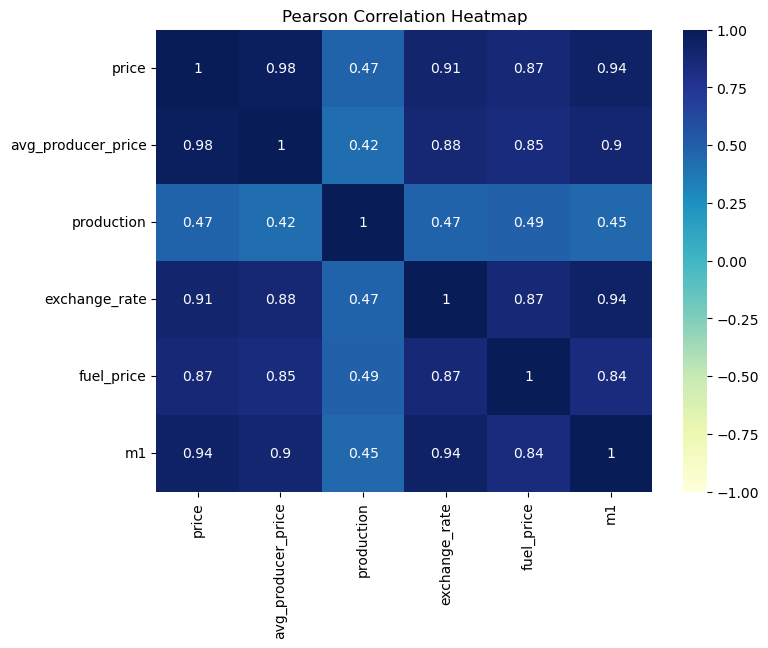

In [12]:
import seaborn as sns

# Calculate correlations
pearson_corr = df_filtered.corr(method='pearson')
spearman_corr = df_filtered.corr(method='spearman')
kendall_corr = df_filtered.corr(method='kendall')

# Create heatmaps
def create_heatmap(corr_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)
    plt.title(title)
    plt.show()

create_heatmap(pearson_corr, "Pearson Correlation Heatmap")

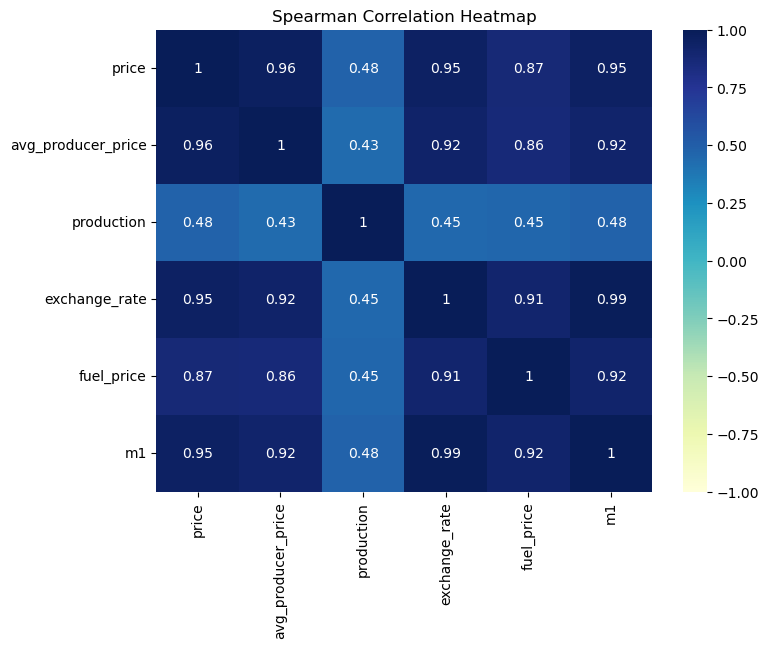

In [13]:
create_heatmap(spearman_corr, "Spearman Correlation Heatmap")

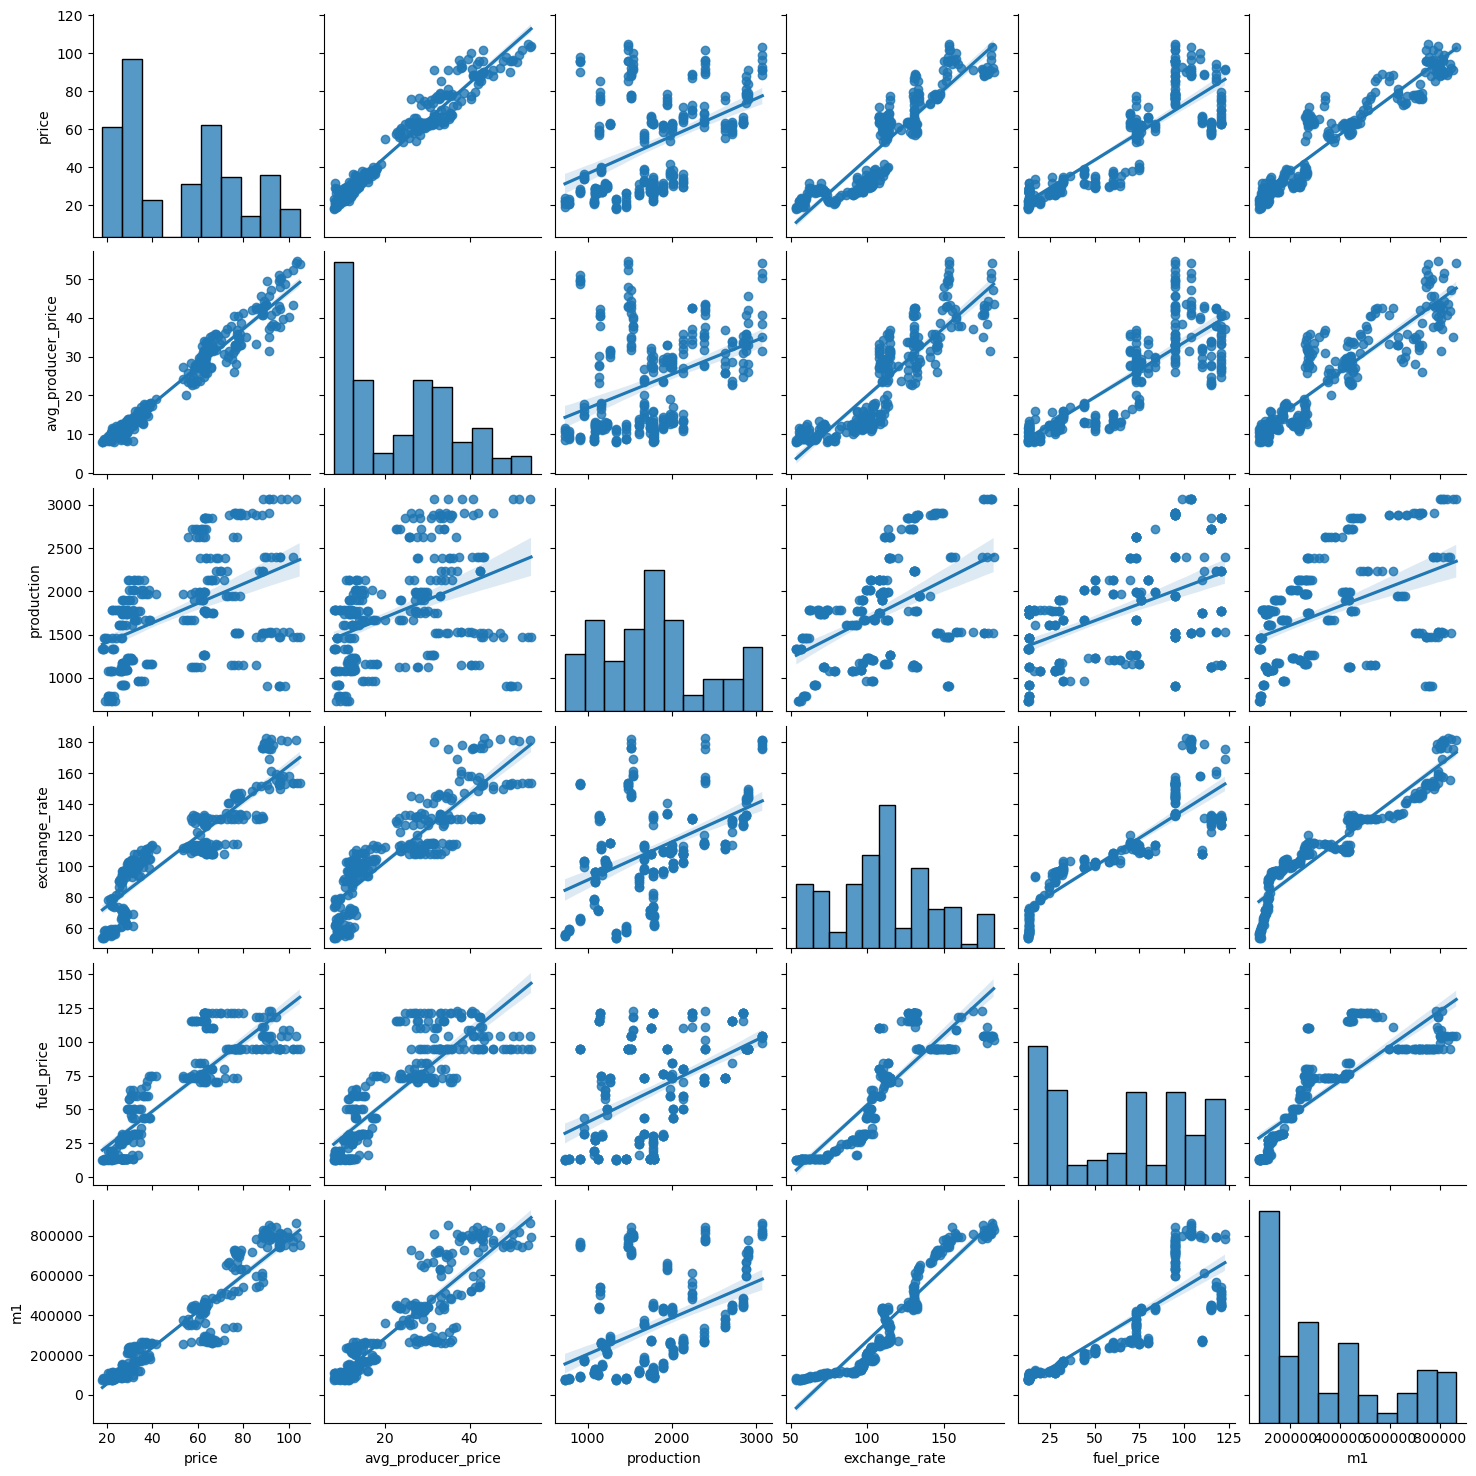

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatterplot matrix using Seaborn's pairplot function
sns.pairplot(df_filtered, kind='reg')

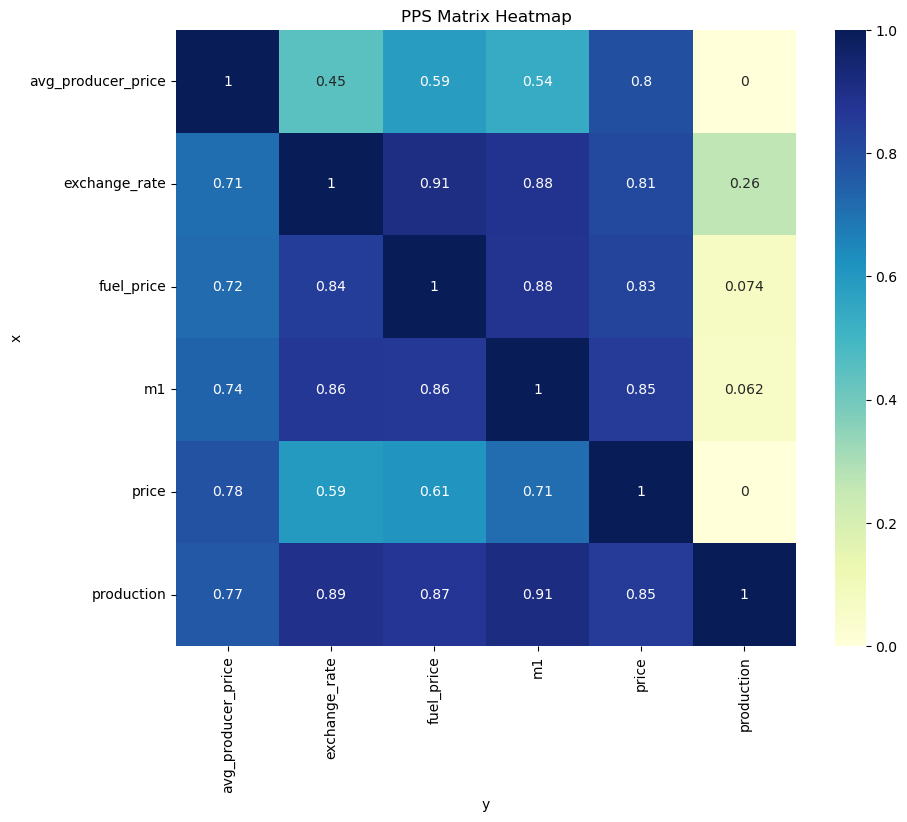

In [16]:
import ppscore as pps

pps_matrix_df = pps.matrix(df_filtered)

# plot heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(pps_matrix_df.pivot("x", "y", "ppscore"), annot=True, cmap="YlGnBu", ax=ax)
ax.set_title("PPS Matrix Heatmap")
plt.show()

In [21]:
# Specify the target variable and potential predictors
target_var = 'price'
predictor_vars = [col for col in df_filtered.columns if col != target_var]

# Perform Granger causality tests for each predictor variable
granger_results = {}
for predictor_var in predictor_vars:
    print(target_var)
    print(predictor_var)
    print('─' * 25)
    test_results = grangercausalitytests(df_filtered[[target_var, predictor_var]], 4)
    granger_results[predictor_var] = test_results


price
avg_producer_price
─────────────────────────

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=59.8936 , p=0.0000  , df_denom=284, df_num=1
ssr based chi2 test:   chi2=60.5263 , p=0.0000  , df=1
likelihood ratio test: chi2=54.9198 , p=0.0000  , df=1
parameter F test:         F=59.8936 , p=0.0000  , df_denom=284, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=33.3602 , p=0.0000  , df_denom=281, df_num=2
ssr based chi2 test:   chi2=67.9075 , p=0.0000  , df=2
likelihood ratio test: chi2=60.9305 , p=0.0000  , df=2
parameter F test:         F=33.3602 , p=0.0000  , df_denom=281, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=21.8066 , p=0.0000  , df_denom=278, df_num=3
ssr based chi2 test:   chi2=67.0669 , p=0.0000  , df=3
likelihood ratio test: chi2=60.2297 , p=0.0000  , df=3
parameter F test:         F=21.8066 , p=0.0000  , df_denom=278, df_num=3

Granger Causality
number of lags (no zero)

In [19]:
predictor_var

'm1'